# Bio-Signal Analysis for Smoking

## By: Ayush Trivedi

### Importing the Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

### Loading the Data

In [2]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Bio-Signal-Analysis\smoking.csv") 
df=df.drop(columns=["ID","oral"])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [4]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(55692, 25)
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                  object
smoking                  int64
dtype: object
                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  55692.000000  55692.000000  55692.000000  55692.000000    55692.000000   
mean      44.182917    164.649321    

In [5]:
print(df.isnull().sum())

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64


### Data Visualization

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


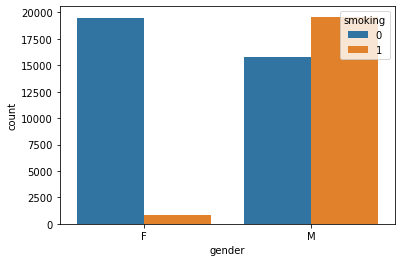

In [6]:
sns.countplot(df['gender'], hue=df['smoking'])
plt.show()

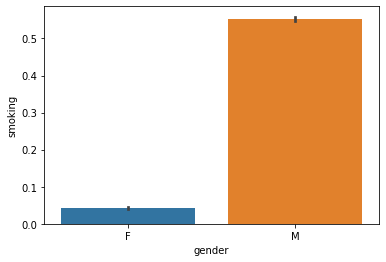

In [7]:
sns.barplot(x=df['gender'],y=df['smoking'])
plt.show()

<AxesSubplot:ylabel='smoking'>

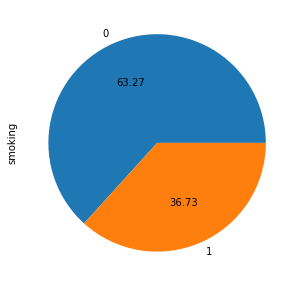

In [9]:
plt.figure(figsize=(10,5))
df['smoking'].value_counts().plot.pie(autopct='%0.2f')

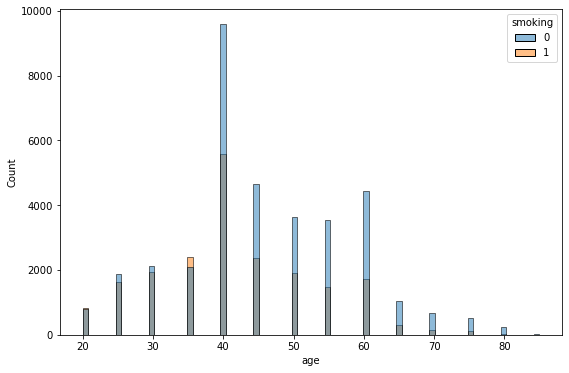

In [10]:
plt.figure(figsize=(9,6))
sns.histplot(x=df["age"],hue=df["smoking"])
plt.show()

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


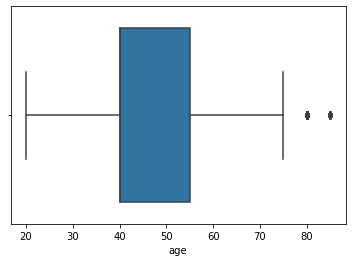

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


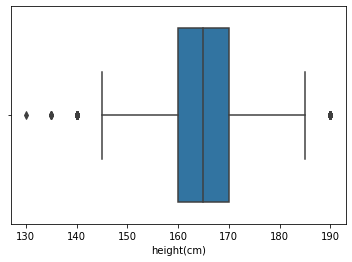

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


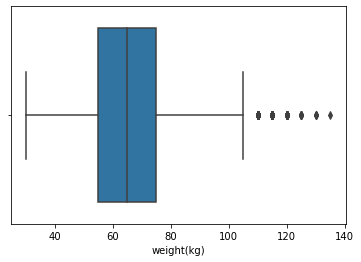

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


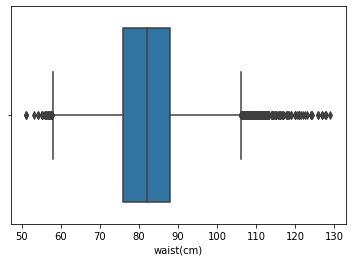

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


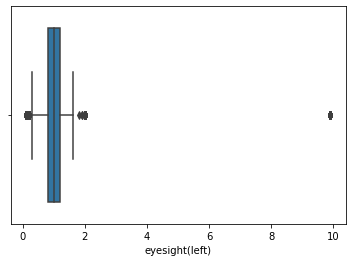

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


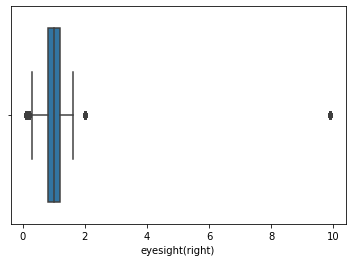

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


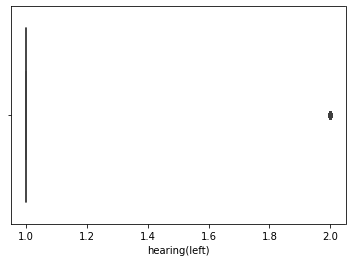

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


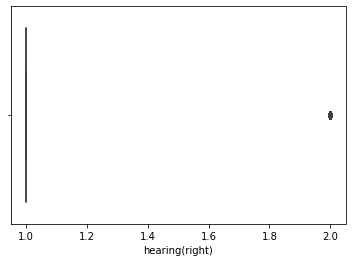

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


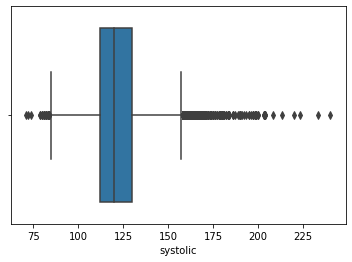

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


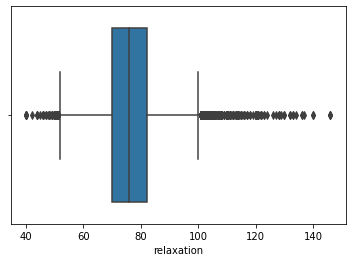

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


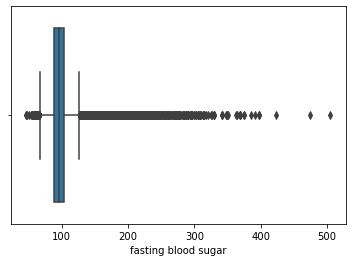

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


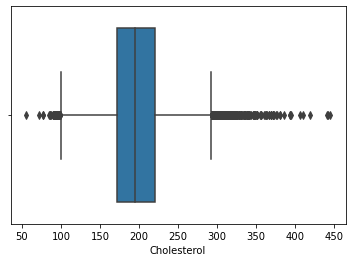

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


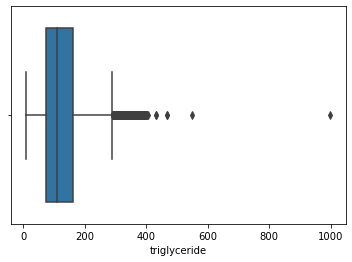

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


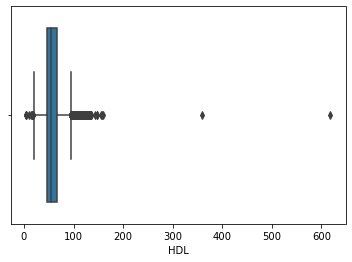

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


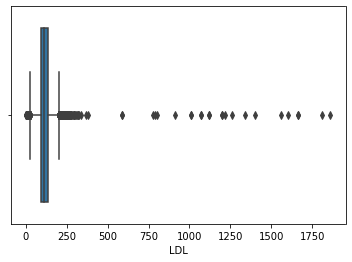

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


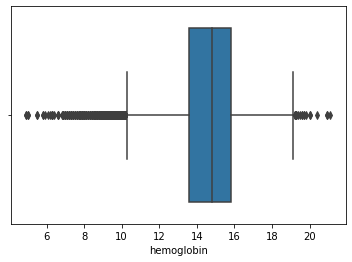

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


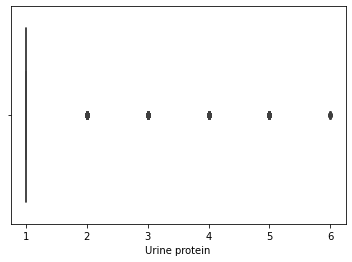

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


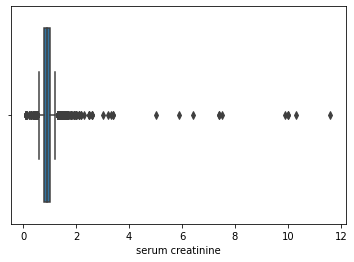

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


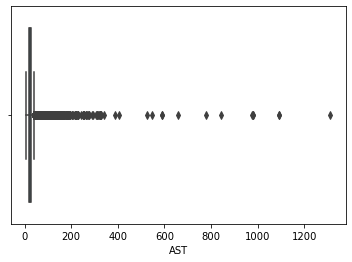

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


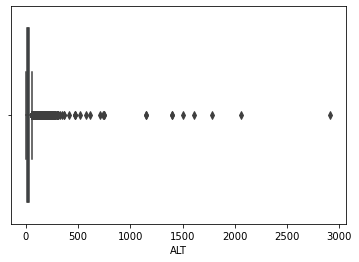

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


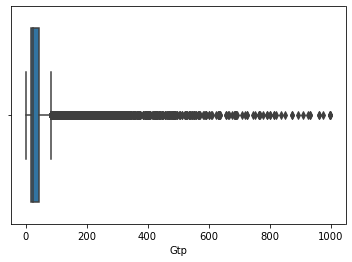

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


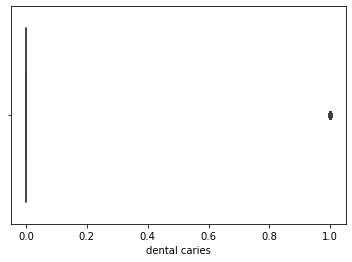

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


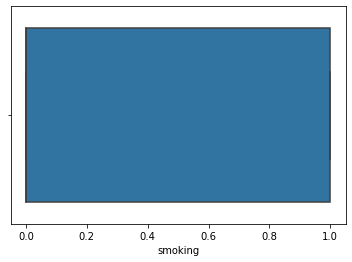

In [11]:
for i in df.columns:
    if(df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        sns.boxplot(df[i])
        plt.show()

### Data Cleaning

In [14]:
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["tartar"]=le.fit_transform(df["tartar"])
df["dental caries"]=le.fit_transform(df["dental caries"])

### Feature Selection using Feature Importance

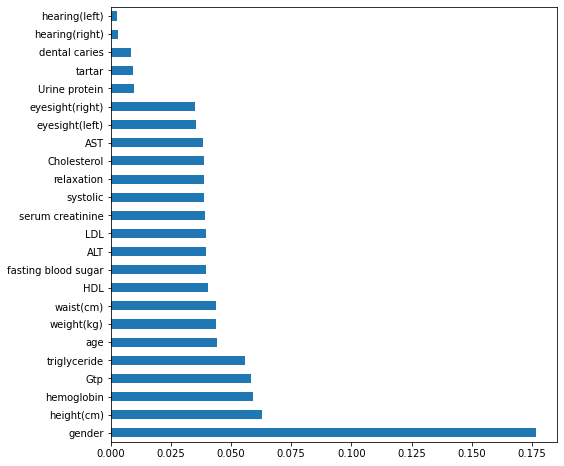

In [15]:
X=df.iloc[:,:-1]
y=df["smoking"]
model=ExtraTreesClassifier()
model.fit(X,y)
df1=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(8,8))
df1.nlargest(24).plot(kind='barh')
plt.show()

### Logistic Regression

In [18]:
X=df[["gender","height(cm)","Gtp","hemoglobin","triglyceride","age","weight(kg)","waist(cm)","HDL","serum creatinine","ALT","fasting blood sugar","relaxation","LDL","systolic"]]
y=df["smoking"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification_report:",classification_report(y_test,y_pred))

Accuracy_score: 0.7351647365113565
Classification_report:               precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



### Decision Tree

In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.71      0.71      0.71      4112

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



### Bagging Algorithm - Bagging Classifier

In [23]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000)
bagging_clf.fit(x_train, y_train)
print(bagging_clf.score(x_test, y_test))
y_pred = bagging_clf.predict(x_test)
print(classification_report(y_test, y_pred))

0.8283508393931233
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



### Bagging Algorithm – Extra Trees

In [24]:
et=ExtraTreesClassifier(n_estimators=1000,random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.82      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



### Bagging Algorithm – Random Forest

In [25]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139

